# Memoir Close Reading

## Journal de Goncourt

words/phrases to investigate:

(need French translations) the left, the _ left, suppression, mass rising, mobocracy, insurrection, insurgents, National Guards, Republicanism, reg flag, crowd, mob, gang, violence, friendliness, Prussians, Bellevillans, murders, cannon, cannonade, noise, aggressive, drunk, drunkenness, intoxicated, Federals, barricade, altercation, middle-class, upper-class, shout, dispute, fight, corpse, death, wounded, burning, burn, blood, bullets, shells

places:

College de France, Montmartre, Courberoie, Hotel de Ville, Issy, Neuilly, Arc de l'Etoile, Auteuil, Pepiniere barracks, Opera House, Jardin des Plantes, Faubourg Saint-Germain, Monceau, Batignolles, Tuileries, Passy, Palais Royal, Tuileries, Palais de Justice, Preferecture of Police

people:

Jules Valles, Assi, Clement Thomas, Lecomte, Archbishop, Mont-Valerian, MacMahon

timeline of events and selected quotes:

70.09.25: notice posted outside the college de france announcing the formation of the Commune. demands the suppression of the Prefecture of POlice

70.09.30: "liberty, equality, fraternity" appears

70.10.28: National Guards recruiting on a platform with stairs "draped in the red cloth used by wine merchants"

70.10.31: National Guards shouting "Vive la Commune". "The Government is upset, the Commune established, and the list of the man who has been dictating is to be confirmed by universal suffrage." "Vociferous and gesticulating mobocracy" The date "of a revolution." Except - he doesn't mention the Commune again for a while.

71.03.18: "fighting going on at Montmartre" "triumphing insurrection takes possession of Paris." "Hotel de Ville... orators are speaking of putting traitors to death" "Clement Thomas and Lecomte had been shot"

71.03.19: "Army is in full retreat upon Versailles"

71.03.20: Complains about no "National Guard of the Middle Classes"

71.03.31: Jules Valles, Assi (I forget context)

71.04.02: "Cannonade in the direction of Courberoie. Civil War has commenced!" "... hypocritical murders." "... the Bellevillans have been defeated."

71.04.03: More cannonade, mentions becoming accustomed to cannonade.

71.04.04: "Drunkenness of the National Guards is becoming aggressive to passers-by"

71.04.05: "government of the Committee seems to be at an end; yet the cannonade lasted all day around the fort at Issy, where one sees the largest red flag waving"

71.04.07: "it's quite likely the archbishop will be shot tonight". referencing plan to confiscate weapons: "petty preparations for a reign of terror" 

71.04.09: weapons confiscated from citizens

71.04.14: incoming draft mentioned. 

71.04.15: "I am more frightened than I ever was in the time of the Prussians"

71.04.21: Draft

Time skip - journal says the entries are almost exclusively about bombing and hatred of the Communards

71.05.22: barricade "guarded by a few men who look the reverse of energetic". Versailles at Pepiniere barracks. "National Guards and middle-class men are having altercations all over the place." "there is not a single member of the Commune along the whole line of boulevards" "shouts, disputes, and fights" "everybody whom the National Guard finds in the streets is forcibly enlisted", "hear all night the voices of intoxicated National Guards, shoating hoarsely at every passer-by. It was a day when I at last fell into a sleep broken by explosions and nightmares."

71.05.23: Versailles occupy Faubourg Saint-Germain, Monceau, and Batignolles "immense battlefield... engagements which were taking place from Jardin des Plantes as far as Montmartre" "One sees a corpse with a bleeding head, which four men carry by the arms and legs like a packet of dirty linen, taking it from door to door, none of which will open"

71.05.28: He surveys the damage done to Paris. Sees 26 prisoners walking to their execution. Executioners exit "like drunken men"

71.05.29: "one once more feels the movement of Paris coming to life again"

71.05.30: "from time to time we hear frightful noises - houses collapsing, or volleys"




        







In [6]:
import re
import pickle
import pandas as pd
from helpers import *
import glob, os

cuts = pd.read_csv('memoir_cuts.csv', encoding = "ISO-8859-1")
start_cuts = {}
end_cuts = {}
for index, row in cuts.iterrows():
    start_cuts[row[0]] = str((row[1])).lower().replace(chr(92) + "n", "\n")
    end_cuts[row[0]] = str((row[2])).lower().replace(chr(92) + "n", "\n")

pro_commune_memoirs = pd.DataFrame(glob.glob("memoirs_complete\pro\*.txt"), columns=['filename'])
anti_commune_memoirs = pd.DataFrame(glob.glob("memoirs_complete\\anti\*.txt"), columns=['filename'])
pro_commune_memoirs['bias'] = "pro"
anti_commune_memoirs['bias'] = "anti"
commune_memoirs = pd.concat([pro_commune_memoirs, anti_commune_memoirs], ignore_index=True)
commune_memoirs['filename'] = commune_memoirs['filename'].str.replace("memoirs_complete\\pro\\","")
commune_memoirs['filename'] = commune_memoirs['filename'].str.replace("memoirs_complete\\anti\\","")

commune_memoirs['pre_spellcheck_tokens'] = ""

print(start_cuts)
print(end_cuts)

for index, row in commune_memoirs.iterrows():

    # import memoir
    f = open("memoirs_complete\\" + row[1] + "\\" + row[0], 'r')
    memoir = f.read()

    # find potential contractions
    # find_potential_contractions(memoir)

    # lowercase
    #memoir = memoir.lower()

    # Cut out everything up to string (inclusive)
    if row[0] in start_cuts.keys():
        memoir = memoir[memoir.lower().find(start_cuts[row[0]]) + len(start_cuts[row[0]]):]

    # Cut out everything at or beyond string (inclusive)
    if row[0] in end_cuts.keys():
        memoir = memoir[:memoir.lower().rfind(end_cuts[row[0]])]

    # cut out stuff between pages - will differ based on memoirs
    memoir = re.sub(r'\sJOURNAL\sDE\sLA\sCOMMUNE\s[0-9]+', '', memoir)
    memoir = re.sub(r'[0-9]+\sJOURNAL\sDE\sLA\sCOMMUNE\s', '', memoir)

    # create paragraph breaks - involves reducing all 2+ consecutive linebreaks into just 2, treating paragraph break as \n\n 
    memoir = re.sub('(\n\s\n)','\n\n',memoir)
    consecutive_linebreak_checker = re.compile('(\n)\2{2,}')
    memoir = re.sub(consecutive_linebreak_checker,'\n\n',memoir)
    memoir = re.sub('(-\n[a-z])','',memoir)
    memoir = re.sub('\n\n',' <PB> ',memoir)
    memoir = re.sub('\n',' ',memoir)

    # fix common mispellings
    memoir = memoir.replace(" i[ "," il ")
    memoir = memoir.replace(" [l "," il ")
    memoir = memoir.replace(" ]l "," il ")
    memoir = memoir.replace(" i] "," il ")
    memoir = memoir.replace(" 1] "," il ")
    memoir = memoir.replace(" ÿ ", " y ")
    memoir = memoir.replace(" | es ", " les")

    # spell out common abbreviations (trying to avoid punctuation due to sentence separator)
    memoir = memoir.replace(" m. "," monsieur ")
    memoir = memoir.replace(" mm. ", "messieurs")
    memoir = memoir.replace(" mme. ", "madame")

    # create sentence breaks - involves treating all instances of <letter><punctuation> <letter> as sentence break (variations allowed, eg ' end sentence." start sentence')
    memoir = re.split(r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s", memoir)
    memoir = [sentence.strip().replace(" <PB> ", " ") for sentence in memoir] # remove paragraph breaks inside of sentences (because they shouldn't be there; likely due to pagebreak)
    memoir = ' <SB> '.join(memoir)
    while '  ' in memoir:
        memoir = memoir.replace('  ', ' ')
    memoir = memoir.replace(" <SB> <PB> ", " <PB> ")

    # list of words and phrases we're interested in
    wois = ["commune"]
    # list of words and phrase we certainly don't want spellchecker to 'fix'
    preserved = ["<PB>", "<SB>"]

    # split text into tokens, prepare for ocr error correction and lemmatization
    memoir_tokens = memoir.split()

    # save preprocessing thus far, prepare for spellcheck dictionary
    commune_memoirs.at[index, 'pre_spellcheck_tokens'] = memoir_tokens

with open('pre_spellcheck/commune_memoirs.pkl', 'wb') as f:
    pickle.dump(commune_memoirs, f)

# create corpus-wide dictionary of misspelled wois -> properly spelled wois
##memoir_tokens_unique = commune_memoirs['pre_spellcheck_tokens'].apply(pd.Series).stack().unique()
##with open('pre_spellcheck/memoir_tokens_unique.pkl', 'wb') as f:
##    pickle.dump(memoir_tokens_unique, f)
#find_misspelled_wois(memoir_tokens_unique, wois, preserved)

# bring in spellcheck dictionary
with open('spell_fixer.pkl', 'rb') as f:
    spell_fixer = pickle.load(f)

commune_memoirs['processed_text'] = ""

for index, row in commune_memoirs.iterrows():

    # apply the spell fixer to memoir tokens
    memoir_tokens = row[2]
    memoir_tokens = [spell_fixer[token] if token in spell_fixer.keys() else token for token in memoir_tokens]
    memoir_tokens

    # convert memoir into string for later processing
    memoir_processed = ' '.join(memoir_tokens)
    commune_memoirs.at[index, 'processed_text'] = memoir_processed

commune_memoirs = commune_memoirs.drop(['pre_spellcheck_tokens'], axis = 1)

with open('memoirs_preprocessed.pkl', 'wb') as f:
    pickle.dump(commune_memoirs, f)

commune_memoirs

{'andre_leo.txt': 'la\n\nguerre sociale\n\n\n', 'arnould_1.txt': 'genève, janvier 1878.', 'arnould_2.txt': 'histoire populaire\n\nde la\n\ncommune de paris\n\n', 'arnould_3.txt': 'histoire populaire\n\nde la\n\ncommune de paris\n\n', 'beslay.txt': 'préface\n\n', 'cluseret_1.txt': 'introduction\n\n', 'cluseret_2.txt': 'lè&t5ern1ers combats\n\n', 'cluseret_3.txt': 'introduction\n\n', 'da_costa_1.txt': 'avant-propos\n\n', 'da_costa_2.txt': 'la tragédie des otages\n\n(su!te)\n\n', 'da_costa_3.txt': 'introduction\n\n', 'elie.txt': '\n\\x0cjournal de la commune\n\n \n\n', 'jean.txt': 'avant-propos\n\n', 'jourde.txt': '\n\n1877\n\ncase de déportés (ile des pins).\n\n', 'lefrancais.txt': 'imprimerie n. guillaume fils. nkucui.vtel.\n\n', 'lissagaray.txt': '\n\n1871.\n\ntous droits réservés.\n\n', 'verges_desboeufs.txt': 'esboeufs\n\ntemoin oculaire\n\n', 'victorine_brocher.txt': '\n\n1909\n\ntous droits réservés\n\npréface\n\n', 'arsac.txt': 'préface\n\n', 'bourde.txt': '\n\\x0cpréface\n\n', 'c

,filename,bias,processed_text
0,andre_leo.txt,pro,"Mesdames, Messieurs, En 1867, quand la Ligue d..."
1,arnould_1.txt,pro,<PB> 1 LA SOIRÉE DU 3 SEPTEMBRE. <SB> — LE DER...
2,arnould_2.txt,pro,VIII LE 18 MARS! Sous l'empire de ce sentiment...
3,arnould_3.txt,pro,XIV LA COMMUNE. <SB> - AUTRES CAUSES D'AFFAIBL...
4,beslay.txt,pro,Souvenirs qu'a laissés la Commune. <SB> Souven...
5,cluseret_1.txt,pro,"J'extrais ces pages de mes mémoires, pour le p..."
6,cluseret_2.txt,pro,Chapitre 1 L'ENTREVUE D'AUBERVILLiERS Les Prus...
7,cluseret_3.txt,pro,SILENCE AUX CALOMNIATEURS ¡ Notes autobiograph...
8,da_costa_1.txt,pro,"« Le bleu, vous l'avez bu, parce que vous êtes..."
9,da_costa_2.txt,pro,CHAPITRE VI EXÉCUTtOX DE SIX OTAGES A LA ROQUE...


In [7]:
tmp = commune_memoirs.at[27,"processed_text"]
tmp[-100:]

'e temps en temps des bruits redoutables : des écroulements de maisons et des fusillades. <SB> | <PB>'

In [ ]:
from datetime import datetime

# Extract date-specific info where possible
commune_memoirs_date_view = pd.DataFrame(columns=['filename', 'bias', 'date', 'processed_text', 'note'])

# Function for adding row
def add_row(df, filename, bias, date, processed_text, note = ""):
    df.loc[len(df)] = [filename, bias, date, processed_text, note]
    return df

# Function for accessing memoir metadata
def access_memoir_meta(commune_memoirs, filename):
    return commune_memoirs.at[commune_memoirs.index[commune_memoirs['filename'] == filename][0], "bias"], commune_memoirs.at[commune_memoirs.index[commune_memoirs['filename'] == filename][0], "processed_text"]

# Function for accessing substring of text
def access_substring(text, start_non_inclusive, end_non_inclusive):
    return text[text.lower().find(start_non_inclusive) + len(start_non_inclusive):text.lower().find(end_non_inclusive)]

# elie
filename = "elie.txt"
bias, processed_text = access_memoir_meta(commune_memoirs, filename)
processed_text = processed_text.replace("Paris, 22mars 1871.", "paris, 22 mars 1871.")
processed_text = processed_text.replace("Paris, 27 mars 1571", "paris, 27 mars 1871")
processed_text = processed_text.replace("1% avril 1871", "1 avril 1871")
processed_text = processed_text.replace("Paris, 7 Avr 1 1871", "paris, 7 avril 1871")
processed_text = processed_text.replace("Samedi, 8 avril.", "paris, 8 avril 1871")
processed_text = processed_text.replace("Pâques, 9 avril.", "paris, 9 avril 1871")
processed_text = processed_text.replace("Jeudi 19.", "strange 19 avril 1871")
processed_text = processed_text.replace("Lundi, 10 avril.", "paris, 10 avril 1871")
processed_text = processed_text.replace("Paris, 11 avril.", "paris, 11 avril 1871")
processed_text = processed_text.replace("Mercredi. <SB> 12 avril.", "paris, 12 avril 1871")
processed_text = processed_text.replace("Jeudi, 13 avril.", "paris, 13 avril 1871")
processed_text = processed_text.replace("Vendredi, 14 avril.", "paris, 14 avril 1871")
processed_text = processed_text.replace("Samedi, 15 avril.", "paris, 15 avril 1871")
processed_text = processed_text.replace("Paris, 16 avril.", "paris, 16 avril 1871")
processed_text = processed_text.replace("Lundi, 17 avril", "paris, 17 avril 1871")
processed_text = processed_text.replace("Mardi, 18 avril.", "paris, 18 avril 1871")
processed_text = processed_text.replace("Mercredi le 19 avril.", "paris, 19 avril 1871")
processed_text = processed_text.replace("Jeudi 20 avril.", "paris, 20 avril 1871")
processed_text = processed_text.replace("Vendredi 21 avril.", "paris, 21 avril 1871")
processed_text = processed_text.replace("Samedi, 22 avril.", "paris, 22 avril 1871")
processed_text = processed_text.replace("« Paris, 19 avril 1871", "strange 2 19 avril 1871")
processed_text = processed_text.replace("Dimanche, 20 avril. <SB> Du", "strange 20 avril 1871")
processed_text = processed_text.replace("Dimanche, 23 avril.", "paris, 23 avril 1871")
processed_text = processed_text.replace("Mardi, 25 avril.","paris, 25 avril 1871")
processed_text = processed_text.replace("Mercredi, 26 avril.","paris, 26 avril 1871")
processed_text = processed_text.replace("Jeudi, 27 avril.","paris, 27 avril 1871")
processed_text = processed_text.replace("Vendredi, 28 avril.","paris, 28 avril 1871")
processed_text = processed_text.replace("Samedi, 29 avril.","paris, 29 avril 1871")
processed_text = processed_text.replace("Dimanche, 30 avril.","paris, 30 avril 1871")
processed_text = processed_text.replace("Lundi, 1°" + chr(34) + " mai.","paris, 1 mai 1871")
processed_text = processed_text.replace("Mardi, 2 mai.","paris, 2 mai 1871")
processed_text = processed_text.replace("Mercredi, 3 mai.","paris, 3 mai 1871")
processed_text = processed_text.replace("Jeudi 4 mai.","paris, 4 mai 1871")
processed_text = processed_text.replace("Vendredi, 5 mai.","paris, 5 mai 1871") # data on national guard here
processed_text = processed_text.replace("Samedi. <SB> 6 mai.","paris, 6 mai 1871")
processed_text = processed_text.replace("7 mai.","paris, 7 mai 1871")
processed_text = processed_text.replace("Lundi, 8 mai.","paris, 8 mai 1871")
processed_text = processed_text.replace("Mardi, 9 mai.","paris, 9 mai 1871")
processed_text = processed_text.replace("Mercredi. <SB> 10 mai.","paris, 10 mai 1871")
processed_text = processed_text.replace("11 mai.","paris, 11 mai 1871")
processed_text = processed_text.replace("12 mai.","paris, 12 mai 1871")
processed_text = processed_text.replace("Samedi 13 mai.","paris, 13 mai 1871")
processed_text = processed_text.replace("Dimanche, 14 mai.","paris, 14 mai 1871")
processed_text = processed_text.replace("Lundi, 15 mai.","paris, 15 mai 1871")
processed_text = processed_text.replace("Lundi, 16 mai.","paris, 16 mai 1871")
processed_text = processed_text.replace("Mercredi, 1paris, 7 mai 1871","paris, 17 mai 1871")
processed_text = processed_text.replace("Jeudi, 18 mai.","paris, 18 mai 1871")
processed_text = processed_text.replace("Vendredi 19 mai.","paris, 19 mai 1871")
processed_text = processed_text.replace("Samedi 20 mai.","paris, 20 mai 1871")
processed_text = processed_text.replace("Dimanche 21 mai","paris, 21 mai 1871")
processed_text = processed_text.replace("Lundi 22 mai.","paris, 22 mai 1871")
processed_text = processed_text.replace("Mardi 23 mai.","paris, 23 mai 1871")
processed_text = processed_text.replace("Mercredi 24 mai.","paris, 24 mai 1871")
processed_text = processed_text.replace("Jeudi 25 mai.","paris, 25 mai 1871")
processed_text = processed_text.replace("26 au soir.","paris, 26 mai 1871")
processed_text = processed_text.replace("Samedi 2paris, 7 mai 1871","paris, 27 mai 1871")
processed_text = processed_text.replace("Dimanche 28 mai.","paris, 28 mai 1871")
processed_text = processed_text.replace("Lundi 29.","paris, 29 mai 1871")
processed_text = processed_text.replace("Mardi 50 mai.", "paris, 30 mai 1871")
processed_text = processed_text.replace("Mercredi, 31 mai.", "paris, 31 mai 1871")
date_list = ["20.03.1871", "22.03.1871", "24.03.1871", "25.03.1871",
             "27.03.1871", "01.04.1871", "02.04.1871", "03.04.1871",
             "04.04.1871", "05.04.1871", "06.04.1871", "07.04.1871",
             "08.04.1871", "09.04.1871", "19.04.1871_strange", "10.04.1871",
             "11.04.1871", "12.04.1871", "13.04.1871", "14.04.1871",
             "15.04.1871", "16.04.1871", "17.04.1871", "18.04.1871",
             "19.04.1871", "20.04.1871", "21.04.1871", "22.04.1871",
             "19.04.1871_strange2", "20.04.1871_strange", "23.04.1871",
             "25.04.1871", "26.04.1871", "27.04.1871", "28.04.1871",
             "29.04.1871", "30.04.1871", "01.05.1871", "02.05.1871",
             "03.05.1871", "04.05.1871", "05.05.1871", "06.05.1871",
             "07.05.1871", "08.05.1871", "09.05.1871", "10.05.1871",
             "11.05.1871", "12.05.1871", "13.05.1871", "14.05.1871",
             "15.05.1871", "16.05.1871", "17.05.1871", "18.05.1871",
             "19.05.1871", "20.05.1871", "21.05.1871", "22.05.1871",
             "23.05.1871", "24.05.1871", "25.05.1871", "26.05.1871",
             "27.05.1871", "28.05.1871", "29.05.1871", "30.05.1871",
             "31.05.1871"] # "15 avril" inbetween 23 and 25. "Versailles, le 4 avril 1871." between 25 and 26. 
# "Versailles, 12 avril. 5 h. 50 du soir." and then "« Versailles 16 avril 1871, 5 heures du soir." and then "Versailles, le 23 avril 1871." between 28 and 29.
# "Paris, 20 avril 1871." between Avril 30 and Mai 1 - with some more avril 30 after the flashback :/
for index in range(len(date_list)-1):
    d1 = date_list[index]
    d2 = date_list[index+1]
    if "strange" not in d1 and "strange" not in d2:
        start_non_inclusive = "paris, " + datetime.strptime(d1, '%d.%m.%Y').strftime('%#d %B %Y').replace('March', 'mars').replace('April', 'avril').replace('May', 'mai')
        end_non_inclusive = "paris, " + datetime.strptime(d2, '%d.%m.%Y').strftime('%#d %B %Y').replace('March', 'mars').replace('April','avril').replace('May', 'mai')
    if "strange" in d1:
        if "19.04.1871_strange" == d1:
            start_non_inclusive = "strange 19 avril 1871"
            end_non_inclusive = "paris, " + datetime.strptime(d2, '%d.%m.%Y').strftime('%#d %B %Y').replace('March', 'mars').replace('April','avril').replace('May', 'mai')
        if "19.04.1871_strange2" == d1:
            start_non_inclusive = "strange 2 19 avril 1871"
            end_non_inclusive = "strange 20 avril 1871"
        if "20.04.1871_strange" == d1:
            start_non_inclusive = "strange 20 avril 1871"
            end_non_inclusive = "paris, " + datetime.strptime(d2, '%d.%m.%Y').strftime('%#d %B %Y').replace('March', 'mars').replace('April','avril').replace('May', 'mai')
    if "strange" in d2:
        if "19.04.1871_strange" == d2:
            start_non_inclusive = "paris, " + datetime.strptime(d1, '%d.%m.%Y').strftime('%#d %B %Y').replace('March', 'mars').replace('April', 'avril').replace('May', 'mai')
            end_non_inclusive = "strange 19 avril 1871"
        if "19.04.1871_strange2" == d2:
            start_non_inclusive = "paris, " + datetime.strptime(d1, '%d.%m.%Y').strftime('%#d %B %Y').replace('March', 'mars').replace('April', 'avril').replace('May', 'mai')
            end_non_inclusive = "strange 2 19 avril 1871"
        if "20.04.1871_strange" == d2:
            start_non_inclusive = "strange 2 19 avril 1871"
            end_non_inclusive = "strange 20 avril 1871"
    commune_memoirs_date_view = add_row(commune_memoirs_date_view, filename, bias, d1, access_substring(processed_text, start_non_inclusive, end_non_inclusive))

d1 = "paris, " + datetime.strptime("31.05.1871", '%d.%m.%Y').strftime('%#d %B %Y').replace('March', 'mars').replace('April','avril').replace('May', 'mai')
commune_memoirs_date_view = add_row(commune_memoirs_date_view, filename, bias, "31.05.1871", processed_text[processed_text.find(d1) + len(d1):])

# lissagaray
filename = "lissagaray.txt"
bias, processed_text = access_memoir_meta(commune_memoirs, filename)
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "21.05.1871", access_substring(processed_text, "chapitre premier le dimanche 21", "chapitre ii le lundi 22"))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "22.05.1871", access_substring(processed_text, "chapitre ii le lundi 22", "chapitre iii le mardi 23."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "23.05.1871", access_substring(processed_text, "chapitre iii le mardi 23.", "chapitre iv. <pb> le mercredi 24."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "24.05.1871", access_substring(processed_text, "chapitre iv. <pb> le mercredi 24.", "chapitre v le jeudi 25."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "25.05.1871", access_substring(processed_text, "chapitre v le jeudi 25.", "chapitre vi vendredi 26 — samedi 27 dimanche 23."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "26-28.05.1871", access_substring(processed_text, "chapitre vi vendredi 26 — samedi 27 dimanche 23.", "chapitre vii. <pb> les assassinats"))

# arsac
filename = "arsac.txt"
bias, processed_text = access_memoir_meta(commune_memoirs, filename)
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "18.03.1871", access_substring(processed_text, "première journée 18 mars 1871", "deuxième journée 19 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "19.03.1871", access_substring(processed_text, "deuxième journée 19 mars.", "troisième journée 20 mars"))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "20.03.1871", access_substring(processed_text, "troisième journée 20 mars", "quatrième jouttixée 21 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "21.03.1871", access_substring(processed_text, "quatrième jouttixée 21 mars.", "cinquieme journée «_ 1 r 22 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "22.03.1871", access_substring(processed_text, "cinquieme journée «_ 1 r 22 mars.", "sixième journée 23 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "23.03.1871", access_substring(processed_text, "sixième journée 23 mars.", "huitième journée 25 mars"))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "25.03.1871", access_substring(processed_text, "huitième journée 25 mars", "neuvième journée 26 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "26.03.1871", access_substring(processed_text, "neuvième journée 26 mars.", "dixième journée 27 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "27.03.1871", access_substring(processed_text, "dixième journée 27 mars.", "onzième journée 28 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "28.03.1871", access_substring(processed_text, "onzième journée 28 mars.", "douzième journée. <pb> 29 mars. "))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "29.03.1871", access_substring(processed_text, "douzième journée. <pb> 29 mars. ", "treizième journée. <pb> 30 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "30.03.1871", access_substring(processed_text, "treizième journée. <pb> 30 mars.", "quatorzième journée. <pb> 31 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "31.03.1871", access_substring(processed_text, "quatorzième journée. <pb> 31 mars.", "quinzième journée. <pb> 1er avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "01.04.1871", access_substring(processed_text, "quinzième journée. <pb> 1er avril.", "seizième journée. <pb> 2 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "02.04.1871", access_substring(processed_text, "seizième journée. <pb> 2 avril.", "dix-septième journée. <pb> 3 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "03.04.1871", access_substring(processed_text, "dix-septième journée. <pb> 3 avril.", "dix-huitième journée. <pb> 4 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "04.04.1871", access_substring(processed_text, "dix-huitième journée. <pb> 4 avril.", "dix-neuvième journée. <pb> 5 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "05.04.1871", access_substring(processed_text, "dix-neuvième journée. <pb> 5 avril.", "vingtième journée. <pb> « rrril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "06.04.1871", access_substring(processed_text, "vingtième journée. <pb> « rrril.", "vingt-unième journée. <pb> 7 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "07.04.1871", access_substring(processed_text, "vingt-unième journée. <pb> 7 avril.", "vingt-deuxième journée. <pb> 8 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "08.04.1871", access_substring(processed_text, "vingt-deuxième journée. <pb> 8 avril.", "vingt-troisième journée. <pb> 9 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "09.04.1871", access_substring(processed_text, "vingt-troisième journée. <pb> 9 avril.", "vingt-quatrième journée. <pb> opérations militaires. <pb> 10 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "10.04.1871", access_substring(processed_text, "vingt-quatrième journée. <pb> opérations militaires. <pb> 10 avril.", "vingt-cinquième journée. <pb> opérations militaires. <PB> 11 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "11.04.1871", access_substring(processed_text, "vingt-cinquième journée. <pb> opérations militaires. <pb> 11 avril.", "vingt-sixième journée. <pb> -- 12 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "12.04.1871", access_substring(processed_text, "vingt-sixième journée. <pb> -- 12 avril.", "vingt-septième journée, ? <pb> les combattants, 13 avril.."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "13.04.1871", access_substring(processed_text, "vingt-septième journée, ? <pb> les combattants, 13 avril..", "vingt-huitième journée. <pb> 11 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "14.04.1871", access_substring(processed_text, "vingt-huitième journée. <pb> 11 avril.", "vingt-neuvième journée. <pb> 15-avril,"))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "15.04.1871", access_substring(processed_text, "vingt-neuvième journée. <pb> 15-avril,", "trentième journée. <pb> 16 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "16.04.1871", access_substring(processed_text, "trentième journée. <pb> 16 avril.", "trente et unième journée. <pb> combat d'asnières. <pb> 17 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "17.04.1871", access_substring(processed_text, "trente et unième journée. <pb> combat d'asnières. <pb> 17 avril.", "trente-deuxième journée. <pb> - 18 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "18.04.1871", access_substring(processed_text, "trente-deuxième journée. <pb> - 18 avril.", "trente troisième journée. <pb> 19 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "19.04.1871", access_substring(processed_text, "trente troisième journée. <pb> 19 avril.", "trente-quatrième journée. <pb> 20 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "20.04.1871", access_substring(processed_text, "trente-quatrième journée. <pb> 20 avril.", "trente-quatrième journée. <pb> 21 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "21.04.1871", access_substring(processed_text, "trente-quatrième journée. <pb> 21 avril.", "trente-cinquième journée. <pb> 22 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "22.04.1871", access_substring(processed_text, "trente-cinquième journée. <pb> 22 avril.", "trente-sixième journée. <pb> 23 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "23.04.1871", access_substring(processed_text, "trente-sixième journée. <pb> 23 avril.", "trente-septième journée. <pb> 24 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "24.04.1871", access_substring(processed_text, "trente-septième journée. <pb> 24 avril.", "trente-huitième journée. <pb> 25 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "25.04.1871", access_substring(processed_text, "trente-huitième journée. <pb> 25 avril.", "trente-neuvième journée. <pb> 26 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "26.04.1871", access_substring(processed_text, "trente-neuvième journée. <pb> 26 avril.", "quarantième journée. <pb> 27 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "27.04.1871", access_substring(processed_text, "quarantième journée. <pb> 27 avril.", "quarante et unième journée. <pb> 28 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "28.04.1871", access_substring(processed_text, "quarante et unième journée. <pb> 28 avril.", "quarante-deuxième journée. <pb> 29 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "29.04.1871", access_substring(processed_text, "quarante-deuxième journée. <pb> 29 avril.", "quarante-troisième journée. <pb> 30 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "30.04.1871", access_substring(processed_text, "quarante-troisième journée. <pb> 30 avril.", "quarante-quatrième journée. <pb> 1er mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "01.05.1871", access_substring(processed_text, "quarante-quatrième journée. <pb> 1er mai.", "quarante-cinquième journée. <pb> 2 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "02.05.1871", access_substring(processed_text, "quarante-cinquième journée. <pb> 2 mai.", "quarante-sixième journée. <pb> 3 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "03.05.1871", access_substring(processed_text, "quarante-sixième journée. <pb> 3 mai.", "quarante-septième journée. <pb> affaire du moulin-saquet. <pb> 4 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "04.05.1871", access_substring(processed_text, "quarante-septième journée. <pb> affaire du moulin-saquet. <pb> 4 mai.", "48e, 49e et 50e journée. <pb> * 5, 6 et 7 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "05-07.05.1871", access_substring(processed_text, "48e, 49e et 50e journée. <pb> * 5, 6 et 7 mai.", "51° et 52e journée. <pb> i et 9 mal"))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "09.05.1871", access_substring(processed_text, "51° et 52e journée. <pb> i et 9 mal", "630, 54e et 55e journée. <pb> 10, 11 et 12 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "10-12.05.1871", access_substring(processed_text, "630, 54e et 55e journée. <pb> 10, 11 et 12 mai.", "66* et 576 journée. <pb> 13 et 14 mât."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "13-14.05.1871", access_substring(processed_text, "66* et 576 journée. <pb> 13 et 14 mât.", "58e, 5ge, 60e et 64e journée. <pb> 15, 16, 17 et 18 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "15-18.05.1871", access_substring(processed_text, "58e, 5ge, 60e et 64e journée. <pb> 15, 16, 17 et 18 mai.", "62e, 63e et 64e journée. <pb> 19, 20 et 21 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "19-21.05.1871", access_substring(processed_text, "62e, 63e et 64e journée. <pb> 19, 20 et 21 mai.", "65e, 66e, 67e et 68e journée. <pb> 22, 23, 24 et 25 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "22-25.05.1871", access_substring(processed_text, "65e, 66e, 67e et 68e journée. <pb> 22, 23, 24 et 25 mai.", "trois d'entre eux, sur une vingtaine, ont pu s'échapper."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "26.05.1871", access_substring(processed_text, "trois d'entre eux, sur une vingtaine, ont pu s'échapper.", "le 28, les corps de msr darboy, de mgr surat et de"))

# goncourt
filename = "goncourt.txt"
bias, processed_text = access_memoir_meta(commune_memoirs, filename)
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "18.03.1871", access_substring(processed_text, "® samedi 18 mars.", "dimanche 19 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "19.03.1871", access_substring(processed_text, "dimanche 19 mars.", "lundi 20 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "20.03.1871", access_substring(processed_text, "lundi 20 mars.", "mardi 21 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "21.03.1871", access_substring(processed_text, "mardi 21 mars.", "‘mercredi 22 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "22.03.1871", access_substring(processed_text, "‘mercredi 22 mars.", "… jeudi 23 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "23.03.1871", access_substring(processed_text, "… jeudi 23 mars.", "vendredi 24 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "24.03.1871", access_substring(processed_text, "vendredi 24 mars.", "lundi 27 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "27.03.1871", access_substring(processed_text, "lundi 27 mars.", "mardi 28 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "28.03.1871", access_substring(processed_text, "mardi 28 mars.", " mercredi 29 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "29.03.1871", access_substring(processed_text, " mercredi 29 mars.", "jeudi 30 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "30.03.1871", access_substring(processed_text, "jeudi 30 mars.", "vendredi 31 mars."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "31.03.1871", access_substring(processed_text, "vendredi 31 mars.", "_ samedi 1% avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "01.04.1871", access_substring(processed_text, "_ samedi 1% avril.", "dimanche 2 avril,"))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "02.04.1871", access_substring(processed_text, "dimanche 2 avril,", "lundi 8 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "03.04.1871", access_substring(processed_text, "lundi 8 avril.", "mardi 4 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "04.04.1871", access_substring(processed_text, "mardi 4 avril.", "mercredi 5 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "05.04.1871", access_substring(processed_text, "mercredi 5 avril.", "jeudi 6 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "06.04.1871", access_substring(processed_text, "jeudi 6 avril.", "vendredi 7 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "07.04.1871", access_substring(processed_text, "vendredi 7 avril.", "samedi 10 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "08.04.1871", access_substring(processed_text, "samedi 10 avril.", "dimanche de'päques, 9 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "09.04.1871", access_substring(processed_text, "dimanche de'päques, 9 avril.", "lundi 10 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "10.04.1871", access_substring(processed_text, "lundi 10 avril.", "mardi 11 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "11.04.1871", access_substring(processed_text, "mardi 11 avril.", "… mercredi 12 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "12.04.1871", access_substring(processed_text, "… mercredi 12 avril. ", " jeudi 13 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "13.04.1871", access_substring(processed_text, " jeudi 13 avril.", "vendredi 14 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "14.04.1871", access_substring(processed_text, "vendredi 14 avril.", "samedi 1 5 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "15.04.1871", access_substring(processed_text, "samedi 1 5 avril.", "dimanche 16 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "16.04.1871", access_substring(processed_text, "dimanche 16 avril.", "lundi 17 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "17.04.1871", access_substring(processed_text, "lundi 17 avril.", "mardi 18 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "18.04.1871", access_substring(processed_text, "mardi 18 avril.", "mercredi 19 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "19.04.1871", access_substring(processed_text, "mercredi 19 avril.", "jeudi 20 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "20.04.1871", access_substring(processed_text, "jeudi 20 avril.", "vendredi 21 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "21.04.1871", access_substring(processed_text, "vendredi 21 avril.", "samedi 22 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "22.04.1871", access_substring(processed_text, "samedi 22 avril.", "dimanche 23 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "23.04.1871", access_substring(processed_text, "dimanche 23 avril.", "lundi 24 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "24.04.1871", access_substring(processed_text, "lundi 24 avril.", "mardi 25 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "25.04.1871", access_substring(processed_text, "mardi 25 avril.", "mercredi 26 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "26.04.1871", access_substring(processed_text, "mercredi 26 avril.", "vendredi 28 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "28.04.1871", access_substring(processed_text, "vendredi 28 avril.", "_ samedi 29 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "29.04.1871", access_substring(processed_text, "_ samedi 29 avril.", "dimanche 30 avril."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "30.04.1871", access_substring(processed_text, "dimanche 30 avril.", "lundi 1% mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "01.05.1871", access_substring(processed_text, "lundi 1% mai.", "mardi 2 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "02.05.1871", access_substring(processed_text, "mardi 2 mai.", "mercredi 3 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "03.05.1871", access_substring(processed_text, "mercredi 3 mai.", "jeudi 4 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "04.05.1871", access_substring(processed_text, "jeudi 4 mai.", "vendredi 5 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "05.05.1871", access_substring(processed_text, "vendredi 5 mai.", "dimanche 7 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "07.05.1871", access_substring(processed_text, "dimanche 7 mai.", "* lundi 8 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "08.05.1871", access_substring(processed_text, "* lundi 8 mai.", "mardi 9 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "09.05.1871", access_substring(processed_text, "mardi 9 mai.", "mercredi 10 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "10.05.1871", access_substring(processed_text, "mercredi 10 mai.", "jeudi 11 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "11.05.1871", access_substring(processed_text, "jeudi 11 mai.", "vendredi 12 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "12.05.1871", access_substring(processed_text, "vendredi 12 mai.", "samedi 13 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "13.05.1871", access_substring(processed_text, "samedi 13 mai.", "dimanche 14 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "14.05.1871", access_substring(processed_text, "dimanche 14 mai.", "lundi 15 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "15.05.1871", access_substring(processed_text, "lundi 15 mai.", "mardi 16 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "16.05.1871", access_substring(processed_text, "mardi 16 mai.", "mardi 17 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "17.05.1871", access_substring(processed_text, "mardi 17 mai.", "jeudi 18 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "18.05.1871", access_substring(processed_text, "jeudi 18 mai.", "vendredi 19 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "19.05.1871", access_substring(processed_text, "vendredi 19 mai.", "dimanche 21 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "21.05.1871", access_substring(processed_text, "dimanche 21 mai.", "lundi 22 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "22.05.1871", access_substring(processed_text, "lundi 22 mai.", "mardi 23 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "23.05.1871", access_substring(processed_text, "mardi 23 mai.", "mercredi 24 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "24.05.1871", access_substring(processed_text, "mercredi 24 mai.", "jeudi 25 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "25.05.1871", access_substring(processed_text, "jeudi 25 mai.", "vendredi 26 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "26.05.1871", access_substring(processed_text, "vendredi 26 mai.", "- dimanche 28 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "28.05.1871", access_substring(processed_text, "- dimanche 28 mai.", "lundi 29 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "29.05.1871", access_substring(processed_text, "lundi 29 mai.", "- mardi 30 mai."))
commune_memoirs_data_view = add_row(commune_memoirs_date_view, filename, bias, "30.05.1871", processed_text[processed_text.lower().find("- mardi 30 mai.") + len("- mardi 30 mai."):])

with open('memoirs_preprocessed_date_view.pkl', 'wb') as f:
    pickle.dump(commune_memoirs_date_view, f)

pd.set_option('display.max_rows', None)
commune_memoirs_date_view

In [ ]:
import pickle
import pandas as pd
import re
from tqdm import tqdm

with open('memoirs_preprocessed.pkl', 'rb') as f:
    commune_memoirs = pickle.load(f)

def extract_woi_context(commune_memoirs, wois, window_half):

    woi_context_extraction = pd.DataFrame(columns=['filename', 'bias', 'woi', 'text'])

    for i, row in tqdm(commune_memoirs.iterrows()):

        filename = row[0]

        if filename == "du_camp_1.txt" or filename == "du_camp_2.txt":
            filename = "du_camp.txt"
        if filename == "arnould_1.txt" or filename == "arnould_2.txt" or filename == "arnould_3.txt":
            filename = "arnould.txt"
        if filename == "cluseret_1.txt" or filename == "cluseret_2.txt" or filename == "cluseret_3.txt":
            filename = "cluseret.txt"
        if filename == "da_costa_1.txt" or filename == "da_costa_2.txt" or filename == "da_costa_3.txt":
            filename = "da_costa.txt"

        bias = row[1]
        text = row[2]
                
        text_lower = text.lower()
        for woi in wois:
            print(woi)
            if woi.lower() in text_lower:
                indices_object = re.finditer(pattern=woi, string=text_lower)
                indices = [index.start() for index in indices_object]
                for location in indices:
                    pre_tokens = ' '.join(text_lower[:location].split()[-window_half:])
                    post_tokens = ' '.join(text_lower[location:].split()[:window_half+len(woi.split())])
                    tmp_sequence = pre_tokens + " " + post_tokens
                    woi_context_extraction.loc[len(woi_context_extraction)] = [filename, bias, woi, tmp_sequence]
    
    return woi_context_extraction

# Use function above to extract context windows
words_of_interest = ["la commune", "guerre", "!", "\?"]
pd.set_option('max_colwidth', 400)
tmp = extract_woi_context(commune_memoirs, words_of_interest, 10)


In [ ]:
tmp

In [ ]:
## Sense checking, exploration

#tmp = commune_memoirs_date_view.at[149,"processed_text"]
#tmp[tmp.lower().find("dimanche de'päques, 9 avril"):]
#tmp[-1000:]

#filename = "goncourt.txt"
#bias, processed_text = access_memoir_meta(commune_memoirs, filename)
#processed_text

In [12]:
import pickle
import tqdm
with open('memoirs_preprocessed.pkl', 'rb') as f:
    commune_memoirs = pickle.load(f)

import spacy
## spacy download fr_core_news_md
nlp_fr = spacy.load('fr_core_news_md')

from nltk.corpus import stopwords
stopwords = stopwords.words('french')

from gensim.models import LogEntropyModel
from gensim.corpora import Dictionary

import pandas as pd

# lowercase, lemmatize, tokenize, non-letter removal, short removal, stopword removal
commune_memoirs["hpt"] = commune_memoirs["processed_text"].apply(lambda i: i.lower())
commune_memoirs["hpt"] = commune_memoirs["hpt"].apply(lambda i: nlp_fr(i[0:1000000]))
commune_memoirs["hpt"] = commune_memoirs["hpt"].apply(lambda i: [token.lemma_ for token in i])
#commune_memoirs["hpt"] = commune_memoirs["hpt"].apply(lambda i: i.split())
commune_memoirs["hpt"] = commune_memoirs["hpt"].apply(lambda i: [token for token in i if not token.isnumeric()])
commune_memoirs["hpt"] = commune_memoirs["hpt"].apply(lambda i: [token for token in i if token.isalpha() == True])
commune_memoirs["hpt"] = commune_memoirs["hpt"].apply(lambda i: [token for token in i if len(token) > 2])
commune_memoirs["hpt"] = commune_memoirs["hpt"].apply(lambda i: [token for token in i if token not in stopwords])

# log entropy representation
dct = Dictionary(commune_memoirs["hpt"].tolist())
corpus = [dct.doc2bow(memoir) for memoir in commune_memoirs["hpt"].tolist()]
model = LogEntropyModel(corpus)
lehpt = pd.Series(model[i] for i in corpus)
commune_memoirs = commune_memoirs.assign(le_hpt = lehpt)
le_vectors = []
for i in range(31):
    tmp_dict = {}
    for token_weight in commune_memoirs["le_hpt"][i]:
        tmp_dict[token_weight[0]] = token_weight[1]
    for j in range(len(dct)): # max 
        if j not in tmp_dict:
            tmp_dict[j] = 0
    keys = list(tmp_dict.keys())
    keys.sort()
    sorted_vector = [tmp_dict[i] for i in keys]
    le_vectors.append(sorted_vector)
commune_memoirs["le_vectors"] = le_vectors


In [ ]:
with open('memoirs_preprocessed_le_vectors.pkl', 'wb') as f:
    pickle.dump(commune_memoirs, f)


In [17]:
commune_memoirs_subset = commune_memoirs[["filename", "bias", "le_vectors"]]
commune_memoirs_subset

,filename,bias,le_vectors
0,andre_leo.txt,pro,"[0.01644684821830394, 0.00747164981942694, 0.029213222601871217, 0.008867902530520236, 0.025358317119328733, 0.029914142677675424, 0.06974256938006672, 0.013403509057493167, 0.030457017111794757, 0.006407551662455654, 0.009831990353778458, 0.008009825467726097, 0.010248968123256354, 0.010680260554930916, 0.05061984598998703, 0.026125530780469332, 0.01856635716786346, 0.06974256938006672, 0.014..."
1,arnould_1.txt,pro,"[0, 0.002470953870195964, 0, 0.004648234513473029, 0.0210671865113576, 0, 0, 0.014922195786374538, 0, 0.006717214737483269, 0.00515357456188525, 0.011786571501959013, 0.012904810588765522, 0.005598207192000124, 0, 0.006847030255386409, 0, 0, 0.012876014732408674, 0, 0.009304359781673871, 0.00834525107418641, 0, 0, 0, 0.00886790196842482, 0.00920104906717226, 0, 0, 0, 0.006430362182209549, 0.01..."
2,arnould_2.txt,pro,"[0.012826428386136773, 0.006511767779660718, 0, 0, 0.012477411359767538, 0, 0, 0.012554977676451496, 0.014986196816888845, 0.0031527982525497303, 0, 0.016741879625829847, 0.013975229017586552, 0.008329230946549688, 0, 0.010187278594587111, 0.009135467260925765, 0, 0.012525592437231793, 0.012563286861520591, 0.010319829143623041, 0.012484780731715878, 0.01163637623400035, 0, 0, 0.00832449368450..."
3,arnould_3.txt,pro,"[0, 0.008647657125660346, 0.02230879126165289, 0.008545323079668264, 0.02443588117884221, 0, 0, 0.009064908380340143, 0, 0.006174470109127019, 0.004737170587974984, 0.017457464851713417, 0.012172225267658989, 0.008156022585634122, 0, 0.012587593310739241, 0, 0, 0.012265119729790774, 0, 0.009888995894892135, 0.009911111363528883, 0, 0, 0.00954347669064797, 0.010285901189948961, 0.00654370263434..."
4,beslay.txt,pro,"[0.010053382526316115, 0.006517674484432172, 0, 0.00342004202437444, 0.015500651482909614, 0.011536845914654072, 0, 0.007753901910786027, 0.01951003869895657, 0.005737879380836565, 0, 0.010261806287438852, 0.011581116875611695, 0.004119005571319642, 0, 0.00798481116724836, 0.009035417744047288, 0, 0.00821563962122547, 0, 0.006845889847207399, 0.006835783503817609, 0.004560308527780829, 0.00775..."
5,cluseret_1.txt,pro,"[0, 0.00497977316247485, 0, 0.006287485110584457, 0, 0, 0, 0.006798076324981779, 0.010797256788973262, 0.003101118773620081, 0.008428417847377965, 0.008768291156400891, 0.008233731241032, 0.00652257581252225, 0, 0.012644201442622932, 0.005669359448999821, 0, 0.008471262440929026, 0.003016145279235446, 0.006533564171716571, 0.007243284831209227, 0, 0, 0, 0.009150385399440662, 0.0084757295234110..."
6,cluseret_2.txt,pro,"[0.004473275501944015, 0.0060965020749355996, 0.007945521917831851, 0.006234736741156714, 0, 0, 0, 0.006305742455849349, 0, 0.004046540066891577, 0.0062091645919883955, 0.007809992777466913, 0.007843025402798257, 0.00460408996617454, 0, 0.009184009751946217, 0, 0, 0.00896873761200597, 0, 0.00670909240840577, 0.003729893903828123, 0.005097364004945788, 0, 0.005387310397009734, 0.015450649351026..."
7,cluseret_3.txt,pro,"[0, 0.0036393645594643086, 0, 0.0032664628161069836, 0.005893295865172293, 0, 0, 0.005388043374203455, 0, 0.0023602006422219902, 0.0053055208603021735, 0.0052258650595715175, 0.0060111692815314815, 0.002482102225914716, 0, 0.004811626794033739, 0, 0, 0.006600964573632495, 0.005933856340803698, 0.00334772490518196, 0.004119225661853349, 0.004355524911626284, 0, 0.002904342709710732, 0.003931801..."
8,da_costa_1.txt,pro,"[0.003384003250506912, 0.005230233211130658, 0, 0.004236602952068342, 0, 0, 0, 0.008615343263917677, 0.0072753555963732406, 0.004179161849279391, 0.004697191834728209, 0.006098520300027649, 0.004769730653221498, 0.002197505318613202, 0.020830461994491522, 0.0026877149928317286, 0.0038201004941602955, 0, 0.008023735300687555, 0.0032211581117765793, 0.004775768369601277, 0.005057736798190583, 0...."
9,da_costa_2.txt,pro,"[0, 0.0056729209471530935, 0, 0.0025121931531864655, 0, 0, 0, 0.010034567895119733, 0.004314092852926582, 0.004692221232549762, 0, 0.007192902224146257, 

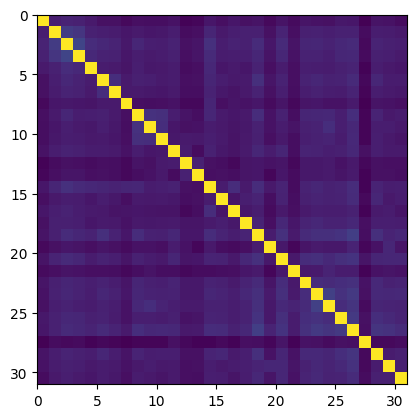

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_self_sim_mat(le_vectors):
    length = len(le_vectors)
    self_sim_mat = np.zeros((length, length))
    i = 0
    for memoir_i in le_vectors:
        j = 0
        for memoir_j in le_vectors:
            cos_sim = np.dot(memoir_i, memoir_j)/(np.linalg.norm(memoir_i)*np.linalg.norm(memoir_j))
            if cos_sim > 1:
                cos_sim = 1
            angular_dis = np.arccos(cos_sim) / np.pi
            self_sim_mat[i][j] = 1 - angular_dis
            j += 1
        i += 1
    self_sim_mat
    plt.imshow(self_sim_mat, cmap='viridis', interpolation='nearest', extent=[0,31,31,0])
    
    plt.show()

plot_self_sim_mat(commune_memoirs_subset["le_vectors"])

In [19]:
import numpy as np
# Perform SVD on vector-memoir matrix, reconstruct without primary component (length)
A_vec_mem = np.array(list(commune_memoirs_subset["le_vectors"])).T

In [20]:
A_vec_mem

array([[0.01644685, 0.        , 0.01282643, ..., 0.0044931 , 0.        ,
        0.        ],
       [0.00747165, 0.00247095, 0.00651177, ..., 0.00590468, 0.00599315,
        0.00572968],
       [0.02921322, 0.        , 0.        , ..., 0.00798073, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01961343],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01961343],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01961343]])

In [23]:
U, S, Vh = np.linalg.svd(A_vec_mem, full_matrices=True)